In [ ]:
!pip install cartopy

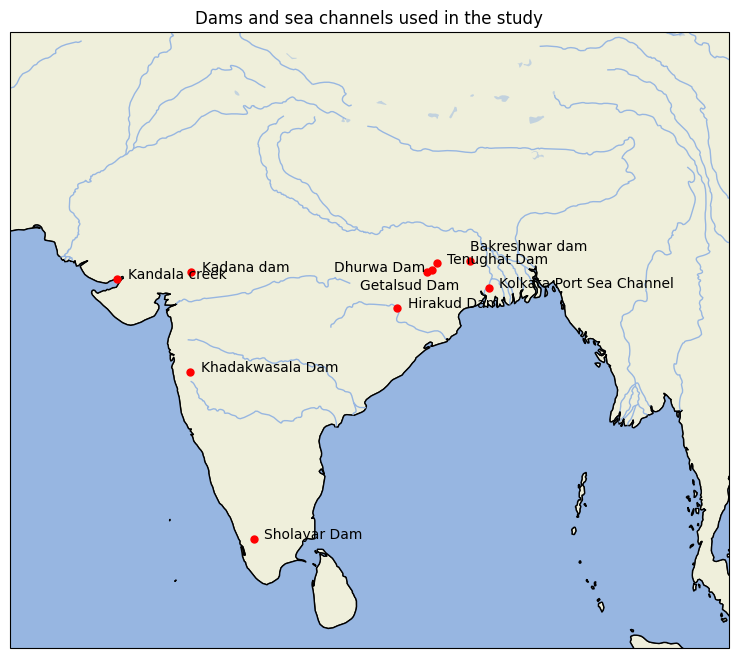

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the projection
projection = ccrs.PlateCarree()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': projection})

# Set the extent (longitude, latitude) for South Asia
ax.set_extent([65, 100, 5, 35], crs=ccrs.PlateCarree())

# Add features to the map
#ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)

# Mark specific latitude and longitude points
# Example points: New Delhi (India), Dhaka (Bangladesh), and Kathmandu (Nepal)
locations = [
    (85.7872, 23.7299, 'Tenughat Dam'),
    (85.5458, 23.4322, 'Getalsud Dam'),
    (88.3149, 22.5461,  'Kolkata Port Sea Channel'),
    (76.8750,10.3126,  'Sholayar Dam'),
    (73.7801,18.4454,  'Khadakwasala Dam'),
    (85.2894,23.3088,  'Dhurwa Dam'),
    (83.87,21.57,  'Hirakud Dam'),
    (70.23406,22.97647, 'Kandala creek'),
    (73.827222,23.307222, 'Kadana dam'),
    (87.4034,23.8278, 'Bakreshwar dam')
]

# Plot each point and annotate
for lon, lat, name in locations:
    ax.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.Geodetic())
    if (name!='Getalsud Dam') & (name!='Dhurwa Dam') & (name!='Bakreshwar dam'):
        ax.text(lon + 0.5, lat, name, horizontalalignment='left', transform=ccrs.Geodetic())
    elif name=='Getalsud Dam':
        ax.text(lon - 3.5, lat-1.0, name, horizontalalignment='left', transform=ccrs.Geodetic())
    elif name=='Dhurwa Dam':
        ax.text(lon - 4.5, lat, name, horizontalalignment='left', transform=ccrs.Geodetic())
    elif name=='Bakreshwar dam':
        ax.text(lon , lat+0.5, name, horizontalalignment='left', transform=ccrs.Geodetic())
plt.title('Dams and sea channels used in the study')
plt.savefig('figure1.png', dpi=500)

In [ ]:
from google.colab import files
files.download('figure1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# INSTALLING REQUIRED LIBRARIES
!pip install -U pyproj -q
!pip install -U utm -q

  Preparing metadata (setup.py) ... done


In [3]:
!pip install -U google-colab -q
!pip install -U tornado -q
!pip install geemap -q
!pip install wxee
!pip install plotly --upgrade
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.2/437.2 kB 11.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado==6.3.3, but you have tornado 6.4.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00


In [4]:
# !earthengine authenticate
import ee
import os

# Set the path to the service account key file
service_account = 'editor@ee-manmeet20singh15-wbis.iam.gserviceaccount.com'
key_file = 'drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json'

# Use the service account for authentication
credentials = ee.ServiceAccountCredentials(service_account, key_file)
ee.Initialize(credentials)

In [5]:
import ee
import wxee
from geopy.geocoders import Nominatim
from pyproj import CRS
import utm
#import proj
import pandas as pd
import numpy as np
import plotly.io as pio

In [6]:
def get_epsg(dam_name, country):
  geolocator = Nominatim(user_agent='my_user_agent')
  # get location in lat lon
  loc = geolocator.geocode(dam_name  + ',' + country)
  # get utm zone and utm letter from lat lon
  x, y, utm_zone, letter = utm.from_latlon(loc.latitude, loc.longitude)
  # predefined utm letters
  # https://www.maptools.com/tutorials/grid_zone_details#:~:text=Each%20zone%20is%20divided%20into,spans%2012%C2%B0%20of%20latitude.
  nothern_letters = ('N','P','Q','R','S','T','U','V','W','X')
  southern_letters = ('M','L','K','J','H','G','F','E','D','C')
  # check hemisphere using utm letter
  if letter in nothern_letters:
    hemisphere = 'nothern'
    north_south = True
  else:
    hemisphere = 'southern'
    north_south = False
  # get crs info using utm zone and hemisphere
  crs = CRS.from_dict({'proj': 'utm', 'zone': utm_zone, north_south: True})
  # formatting epsg code into required fromat
  epsg = crs.to_authority()[0] + ':' + crs.to_authority()[1]
  return epsg, hemisphere, north_south

In [26]:
df = pd.read_csv('drive/MyDrive/Bathy/Survey_Data/Kadana_dam/KADANA_BATHY_50M_Full_Data.txt', header=None)

In [27]:
epsg, hemisphere, north_south = get_epsg(dam_name='Kadana', country='India')

In [28]:
zone = int(epsg[-2:])

In [29]:
from tqdm import tqdm

df_ = df.copy()
df_[[0, 1, 2]] = df_[0].str.split('  ', expand=True)
df = df_.copy()
df = df.apply(pd.to_numeric, errors='coerce')
df.iloc[0,2]
x_coord = df.values[:,0]
y_coord = df.values[:,1]
latitude, longitude = utm.to_latlon(x_coord, y_coord, zone, northern=north_south)
df['lat'] = latitude
df['lon'] = longitude
df['bathy'] =df.iloc[:,2].values
df_survey = df.copy()
df_survey

0           1     2        lat        lon  bathy
0      375947.39  2578235.63  1.19  23.308903  73.786797   1.19
1      375994.70  2578166.20  3.02  23.308279  73.787265   3.02
2      376085.79  2578104.16  1.34  23.307726  73.788161   1.34
3      376170.93  2577894.17  1.62  23.305836  73.789011   1.62
4      376049.95  2578172.97  2.00  23.308345  73.787805   2.00
...          ...         ...   ...        ...        ...    ...
19610  420421.74  2592187.56  3.50  23.437682  74.220969   3.50
19611  420373.13  2592254.08  4.04  23.438280  74.220490   4.04
19612  420320.24  2592333.49  4.34  23.438995  74.219968   4.34
19613  420453.70  2592116.32  4.80  23.437040  74.221286   4.80
19614  420362.90  2592304.44  5.28  23.438735  74.220387   5.28

[19615 rows x 6 columns]

In [31]:
df_test__ = pd.read_csv('drive/MyDrive/Bathy/Survey_Data/Kadana_dam/kadana_full_test_prediction.csv')
df_test__

Unnamed: 0        B1        B2        B3        B4        B5  \
0              167  0.043989  0.049642  0.072253  0.068326  0.110695   
1              168  0.042095  0.044158  0.063253  0.053932  0.092174   
2              169  0.042095  0.042289  0.060547  0.049089  0.085421   
3              170  0.039763  0.037389  0.052547  0.037337  0.066868   
4              171  0.039763  0.036589  0.051242  0.035221  0.061421   
...            ...       ...       ...       ...       ...       ...   
139662      432014  0.049195  0.066095  0.090784  0.094942  0.126368   
139663      432015  0.044595  0.065158  0.087953  0.093405  0.120721   
139664      432016  0.044595  0.048289  0.066195  0.060584  0.090747   
139665      432017  0.042800  0.046395  0.064100  0.056737  0.090700   
139666      432018  0.042800  0.051489  0.072053  0.075263  0.110826   

              B6        B7        B8       B8A  ...          y          x  \
0       0.180068  0.202568  0.223405  0.222600  ...  23.340791  73.786674   
1       0.138016  0.152184  0.152684  0.156553  ...  23.340522  73.786674   
2       0.115737  0.123395  0.117721  0.121037  ...  23.340252  73.786674   
3       0.071521  0.075937  0.072853  0.066947  ...  23.339983  73.786674   
4       0.064511  0.068558  0.064200  0.060358  ...  23.339713  73.786674   
...          ...       ...       ...       ...  ...        ...        ...   
139662  0.153874  0.168342  0.180495  0.185174  ...  23.265602  73.966158   
139663  0.137595  0.149926  0.160595  0.161316  ...  23.265333  73.966158   
139664  0.133868  0.153305  0.151758  0.163789  ...  23.265063  73.966158   
139665  0.151684  0.170637  0.183811  0.186700  ...  23.264794  73.966158   
139666  0.179132  0.201237  0.214984  0.224132  ...  23.264524  73.966158   

           SR_B1     SR_B2     SR_B3     SR_B4     SR_B5     SR_B6     SR_B7  \
0       0.012767  0.022035  0.059737  0.042715  0.311170  0.182003  0.086633   
1       0.012575  0.021265  0.054045  0.039057  0.249680  0.144822  0.071645   
2       0.011338  0.019835  0.049040  0.033915  0.205625  0.101895  0.050772   
3       0.013675  0.020028  0.042137  0.031055  0.121887  0.051268  0.028745   
4       0.013813  0.019752  0.036940  0.026270  0.065265  0.030807  0.019285   
...          ...       ...       ...       ...       ...       ...       ...   
139662  0.012107  0.019340  0.043815  0.029982  0.175210  0.074670  0.039442   
139663  0.011777  0.018377  0.039662  0.029075  0.094058  0.050002  0.026737   
139664  0.010072  0.016672  0.038040  0.027892  0.085175  0.045465  0.025087   
139665  0.009137  0.016948  0.042605  0.031247  0.141770  0.066035  0.039112   
139666  0.007075  0.018075  0.051185  0.039882  0.198942  0.114903  0.060562   

        y_test_pred  
0          2.991990  
1          2.991990  
2          6.349322  
3          4.936066  
4          7.200440  
...             ...  
139662     3.196265  
139663     3.196265  
139664     6.411766  
139665     3.196265  
139666     3.196265  

[139667 rows x 23 columns]

In [33]:
# df_test__['y_test_pred_'] = df_test__['y_test_pred'].clip(lower=0, upper=12)
import plotly.express as px
# df = px.data.carshare()
fig = px.scatter_mapbox(df_test__, lat="y", lon="x", color="y_test_pred",
                  color_continuous_scale=px.colors.sequential.PuBu, size_max=5, zoom=10,
                  mapbox_style="open-street-map")
pio.write_image(fig, 'figure_prediction.png', scale=5)
fig.show()

In [34]:
import plotly.express as px
# df = px.data.carshare()
fig = px.scatter_mapbox(df_survey, lat="lat", lon="lon", color="bathy",
                  color_continuous_scale=px.colors.sequential.PuBu, size_max=5, zoom=10,
                  mapbox_style="open-street-map")
pio.write_image(fig, 'figure.png', scale=5)
fig.show()

In [35]:
!mv figure.png figure_prediction.png drive/MyDrive/Bathy/Survey_Data/Kadana_dam/.

# Hirakud Dam

In [7]:
import pandas as pd
df_test__ = pd.read_csv('drive/MyDrive/Bathy/Survey_Data/Hirakud_dam/test_predictions.csv')
df_survey = pd.read_csv('drive/MyDrive/Bathy/Survey_Data/Hirakud_dam/survey_data.csv')

In [10]:
# df_test__['y_test_pred_'] = df_test__['y_test_pred'].clip(lower=0, upper=12)
import plotly.express as px
# df = px.data.carshare()
fig = px.scatter_mapbox(df_test__, lat="y", lon="x", color="y_test_pred",
                  color_continuous_scale=px.colors.sequential.PuBu, size_max=5, zoom=12,
                  mapbox_style="open-street-map")
pio.write_image(fig, 'figure_prediction.png', scale=5)
fig.show()

In [11]:
import plotly.express as px
# df = px.data.carshare()
fig = px.scatter_mapbox(df_survey, lat="lat", lon="lon", color="bathy",
                  color_continuous_scale=px.colors.sequential.PuBu, size_max=5, zoom=12,
                  mapbox_style="open-street-map")
pio.write_image(fig, 'figure.png', scale=5)
fig.show()

In [12]:
!mv figure.png figure_prediction.png drive/MyDrive/Bathy/Survey_Data/Hirakud_dam/.